In [12]:
"""
Created on Thu January-20-2020 at 15:14:36
@author: Sarthak Jagdale (Author info at the bottom of the notebook)


"""
"""
DocString:
A) Introduction:
    This code is written for analyzing total cases, stateswise testing, finding correlation between 
    various factors and total cases. 
    
    This code has a 5 parts
    1> Null Value removal 
    2> Descriptive statistics
    3> Plotting values  
    4> Heat maps
    5> Infomative Scikit-learn 

B) Bugs : 
    ->  There are little to no Bugs in the Code. 

"""

'\nDocString:\nA) Introduction:\n    This code is written for analyzing total cases, stateswise testing, finding correlation between \n    various factors and total cases. \n    \n    This code has a 5 parts\n    1> Null Value removal \n    2> Descriptive statistics\n    3> Plotting values  \n    4> Heat maps\n    5> Infomative Scikit-learn \n\nB) Bugs : \n    ->  There are little to no Bugs in the Code. \n\n'

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Analysis on Food Delivery </h1>
Perform a analysis for normalization of parameter, then find the best values of the parameters as well as R^2
</div>

<h2 id="ref4">Import all important libraries</h2>
The random seed is a = 222, sklearn has the class  <b>train_test_split and LinearRegression</b> to make the process of finding the best hyperparameter simpler.

In [13]:
#Importing essential libraries
import random as rand # random number generation
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import gender_guesser.detector as gender # using gender guesser
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression

# setting random seed
rand.seed(a = 222)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Importing the data to the notebook
read_file = 'Apprentice_Chef_Dataset.xlsx'

#reading the file
chef = pd.read_excel(read_file)

#Get the top 10 rows for each column
chef.head(n=3)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.0,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.6,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.0,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Use Linear Regression</h1>
Perform a Regression for two parameters, then find the best values of R^2
</div>

In [14]:
lm_rev_meals = smf.ols(formula = """REVENUE ~ chef['TOTAL_MEALS_ORDERED']""",
                        data = chef)

# telling Python to run the data through the blueprint
results = lm_rev_meals.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          4.99e-191
Time:                        22:59:19   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

From the above result we see that R^2 is 36%. Lets try to enhance the 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Plotting Histograms </h1>
Perform a Visual EDA for using Matplotlib, then analyze the results.
</div>

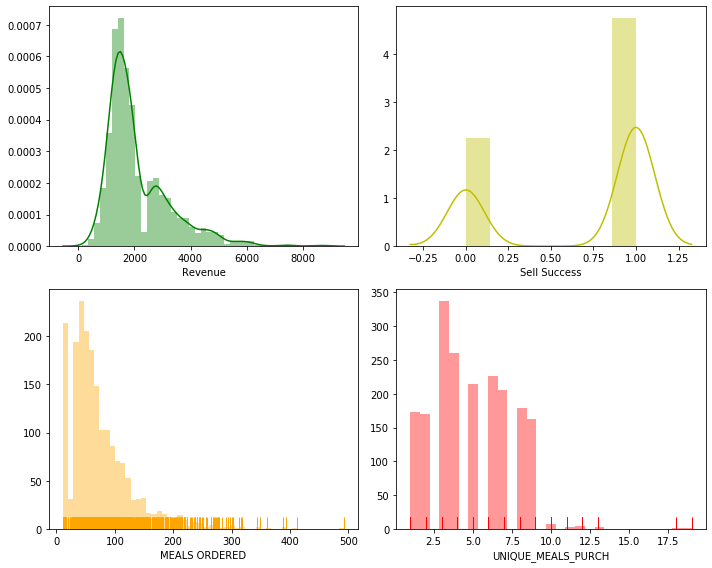

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

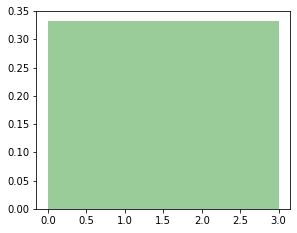

In [15]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Revenue')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Sell Success')
########################

plt.subplot(2, 2, 3)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MEALS ORDERED')


########################
plt.subplot(2, 2, 4)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.tight_layout()
plt.savefig('CHEF Data Histograms1.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Average Time for Prep Video')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('CHEF Data Histograms2.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Mobile Logins')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('PC Login counts')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Weekly Plan')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('CHEF Data Histograms3.png')
plt.show()

########################
########################
# DEFINING OUTLIER THRESHOLD
REVENUE_HI = 2000
CROSS_SELL_SUCCESS_HI = 1
TOTAL_MEALS_ORDERED_HI = 150
PRODUCT_CATEGORIES_VIEWED_HI = 10
PRODUCT_CATEGORIES_VIEWED_LO = 2
AVG_PREP_VID_TIME_HI = 270
AVG_PREP_VID_TIME_LO = 80
LARGEST_ORDER_SIZE_HI = 10
LARGEST_ORDER_SIZE_LO = 2
UNIQUE_MEALS_PURCH_HI = 8
CANCELLATIONS_AFTER_NOON_HI = 2
AVG_TIME_PER_SITE_VISIT_HI = 180
CANCELLATIONS_BEFORE_NOON_HI = 4
MOBILE_LOGINS_HI = 6
PC_LOGINS_HI = 2
WEEKLY_PLAN_HI = 13
################################################################

#  calculating the outlier for Revenue
chef['REVENUE_OUT'] = 0
condition_hi = chef.loc[0:,'REVENUE_OUT'][chef['REVENUE'] > REVENUE_HI]

chef['REVENUE_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['CROSS_SELL_SUCCESS_OUT'] = 0
condition_hi = chef.loc[0:,'CROSS_SELL_SUCCESS_OUT'][chef['CROSS_SELL_SUCCESS'] > CROSS_SELL_SUCCESS_HI]

chef['CROSS_SELL_SUCCESS_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#  calculating the outlier for
chef['TOTAL_MEALS_ORDERED_OUT'] = 0
condition_hi = chef.loc[0:,'TOTAL_MEALS_ORDERED_OUT'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

chef['TOTAL_MEALS_ORDERED_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['UNIQUE_MEALS_PURCH_OUT'] = 0
condition_hi = chef.loc[0:,'UNIQUE_MEALS_PURCH_OUT'][chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

chef['UNIQUE_MEALS_PURCH_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['CANCELLATIONS_AFTER_NOON_OUT'] = 0
condition_hi = chef.loc[0:,'CANCELLATIONS_AFTER_NOON_OUT'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

chef['CANCELLATIONS_AFTER_NOON_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['AVG_TIME_PER_SITE_VISIT_OUT'] = 0
condition_hi = chef.loc[0:,'AVG_TIME_PER_SITE_VISIT_OUT'][chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

chef['AVG_TIME_PER_SITE_VISIT_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['CANCELLATIONS_BEFORE_NOON_OUT'] = 0
condition_hi = chef.loc[0:,'CANCELLATIONS_BEFORE_NOON_OUT'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

chef['CANCELLATIONS_BEFORE_NOON_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['MOBILE_LOGINS_OUT'] = 0
condition_hi = chef.loc[0:,'MOBILE_LOGINS_OUT'][chef['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]

chef['MOBILE_LOGINS_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['PC_LOGINS_OUT'] = 0
condition_hi = chef.loc[0:,'PC_LOGINS_OUT'][chef['PC_LOGINS'] > PC_LOGINS_HI]

chef['PC_LOGINS_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['WEEKLY_PLAN_OUT'] = 0
condition_hi = chef.loc[0:,'WEEKLY_PLAN_OUT'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

chef['WEEKLY_PLAN_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



# calculating the outlier for
chef['PRODUCT_CATEGORIES_VIEWED_OUT'] = 0
condition_hi = chef.loc[0:,'PRODUCT_CATEGORIES_VIEWED_OUT'][chef['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]
condition_lo = chef.loc[0:,'PRODUCT_CATEGORIES_VIEWED_OUT'][chef['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_LO]

chef['PRODUCT_CATEGORIES_VIEWED_OUT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# calculating the outlier for
chef['AVG_PREP_VID_TIME_OUT'] = 0
condition_hi = chef.loc[0:,'AVG_PREP_VID_TIME_OUT'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]
condition_lo = chef.loc[0:,'AVG_PREP_VID_TIME_OUT'][chef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_LO]

chef['AVG_PREP_VID_TIME_OUT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# calculating the outlier for
chef['LARGEST_ORDER_SIZE_OUT'] = 0
condition_hi = chef.loc[0:,'LARGEST_ORDER_SIZE_OUT'][chef['LARGEST_ORDER_SIZE'] > PRODUCT_CATEGORIES_VIEWED_HI]
condition_lo = chef.loc[0:,'LARGEST_ORDER_SIZE_OUT'][chef['LARGEST_ORDER_SIZE'] < PRODUCT_CATEGORIES_VIEWED_LO]

chef['LARGEST_ORDER_SIZE_OUT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


###################################################################################################################




<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Define Threshold Value </h1>
After analyzing the plots, add threshold values to each attribute.
</div>

In [45]:
# DEFINING OUTLIER THRESHOLD
REVENUE_HI = 2000
CROSS_SELL_SUCCESS_HI = 1
TOTAL_MEALS_ORDERED_HI = 150
PRODUCT_CATEGORIES_VIEWED_HI = 10
PRODUCT_CATEGORIES_VIEWED_LO = 2
AVG_PREP_VID_TIME_HI = 270
AVG_PREP_VID_TIME_LO = 80
LARGEST_ORDER_SIZE_HI = 10
LARGEST_ORDER_SIZE_LO = 2
UNIQUE_MEALS_PURCH_HI = 8
CANCELLATIONS_AFTER_NOON_HI = 2
AVG_TIME_PER_SITE_VISIT_HI = 180
CANCELLATIONS_BEFORE_NOON_HI = 4
MOBILE_LOGINS_HI = 6
PC_LOGINS_HI = 2
WEEKLY_PLAN_HI = 13
########################################################
#  calculating the outlier for Revenue
chef['R_OUT'] = 0
condition_hi = chef.loc[0:,'R_OUT'][chef['REVENUE'] > REVENUE_HI]

chef['R_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['CROSS_SELL_SUCCESS_OUT'] = 0
condition_hi = chef.loc[0:,'CROSS_SELL_SUCCESS_OUT'][chef['CROSS_SELL_SUCCESS'] > CROSS_SELL_SUCCESS_HI]

chef['CROSS_SELL_SUCCESS_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
#  calculating the outlier for
chef['TOTAL_MEALS_ORDERED_OUT'] = 0
condition_hi = chef.loc[0:,'TOTAL_MEALS_ORDERED_OUT'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

chef['TOTAL_MEALS_ORDERED_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['UNIQUE_MEALS_PURCH_OUT'] = 0
condition_hi = chef.loc[0:,'UNIQUE_MEALS_PURCH_OUT'][chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

chef['UNIQUE_MEALS_PURCH_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['CANCELLATIONS_AFTER_NOON_OUT'] = 0
condition_hi = chef.loc[0:,'CANCELLATIONS_AFTER_NOON_OUT'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

chef['CANCELLATIONS_AFTER_NOON_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['AVG_TIME_PER_SITE_VISIT_OUT'] = 0
condition_hi = chef.loc[0:,'AVG_TIME_PER_SITE_VISIT_OUT'][chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

chef['AVG_TIME_PER_SITE_VISIT_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['CANCELLATIONS_BEFORE_NOON_OUT'] = 0
condition_hi = chef.loc[0:,'CANCELLATIONS_BEFORE_NOON_OUT'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

chef['CANCELLATIONS_BEFORE_NOON_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['MOBILE_LOGINS_OUT'] = 0
condition_hi = chef.loc[0:,'MOBILE_LOGINS_OUT'][chef['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]

chef['MOBILE_LOGINS_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['PC_LOGINS_OUT'] = 0
condition_hi = chef.loc[0:,'PC_LOGINS_OUT'][chef['PC_LOGINS'] > PC_LOGINS_HI]

chef['PC_LOGINS_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#  calculating the outlier for
chef['WEEKLY_PLAN_OUT'] = 0
condition_hi = chef.loc[0:,'WEEKLY_PLAN_OUT'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

chef['WEEKLY_PLAN_OUT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



# calculating the outlier for
chef['PRODUCT_CATEGORIES_VIEWED_OUT'] = 0
condition_hi = chef.loc[0:,'PRODUCT_CATEGORIES_VIEWED_OUT'][chef['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]
condition_lo = chef.loc[0:,'PRODUCT_CATEGORIES_VIEWED_OUT'][chef['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_LO]

chef['PRODUCT_CATEGORIES_VIEWED_OUT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# calculating the outlier for
chef['AVG_PREP_VID_TIME_OUT'] = 0
condition_hi = chef.loc[0:,'AVG_PREP_VID_TIME_OUT'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]
condition_lo = chef.loc[0:,'AVG_PREP_VID_TIME_OUT'][chef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_LO]

chef['AVG_PREP_VID_TIME_OUT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# calculating the outlier for
chef['LARGEST_ORDER_SIZE_OUT'] = 0
condition_hi = chef.loc[0:,'LARGEST_ORDER_SIZE_OUT'][chef['LARGEST_ORDER_SIZE'] > PRODUCT_CATEGORIES_VIEWED_HI]
condition_lo = chef.loc[0:,'LARGEST_ORDER_SIZE_OUT'][chef['LARGEST_ORDER_SIZE'] < PRODUCT_CATEGORIES_VIEWED_LO]

chef['LARGEST_ORDER_SIZE_OUT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


chef_with_out = chef
chef_with_out.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,Junk Email,Personal Email,Proffessional Email,amex.com,aol.com,apple.com,boeing.com,caterpillar.com,chevron.com,cisco.com,cocacola.com,disney.com,dupont.com,exxon.com,ge.org,gmail.com,goldmansacs.com,homedepot.com,hotmail.com,ibm.com,intel.com,jnj.com,jpmorgan.com,live.com,mcdonalds.com,me.com,merck.com,microsoft.com,mmm.com,msn.com,nike.com,passport.com,pfizer.com,pg.com,protonmail.com,travelers.com,unitedhealth.com,unitedtech.com,verizon.com,visa.com,walmart.com,yahoo.com,R_OUT,CROSS_SELL_SUCCESS_OUT,TOTAL_MEALS_ORDERED_OUT,UNIQUE_MEALS_PURCH_OUT,CANCELLATIONS_AFTER_NOON_OUT,AVG_TIME_PER_SITE_VISIT_OUT,CANCELLATIONS_BEFORE_NOON_OUT,MOBILE_LOGINS_OUT,PC_LOGINS_OUT,WEEKLY_PLAN_OUT,PRODUCT_CATEGORIES_VIEWED_OUT,AVG_PREP_VID_TIME_OUT,LARGEST_ORDER_SIZE_OUT
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scatterplots </h1>
Perform a Visual EDA for using Matplotlib, then analyze the results.
</div>

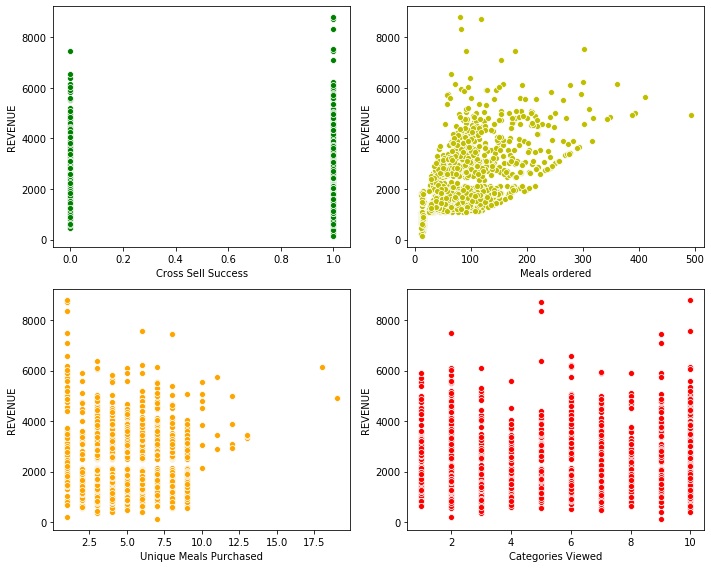

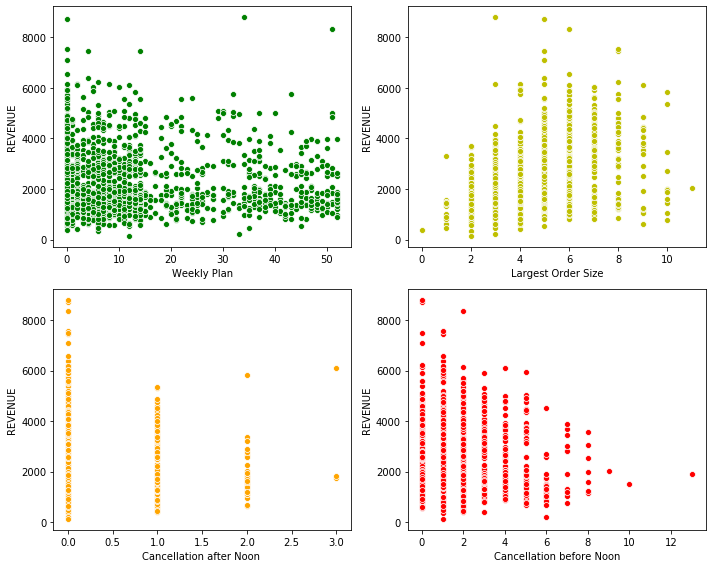

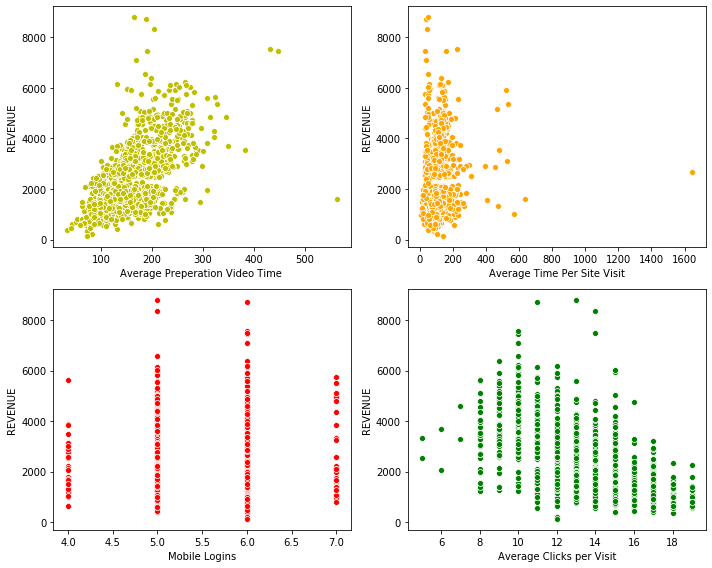

In [46]:



########################################################
# Visual EDA (Scatterplots)
########################################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CROSS_SELL_SUCCESS'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Cross Sell Success')

########################################################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Meals ordered')

########################################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Unique Meals Purchased')

########################################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Categories Viewed')
plt.tight_layout()
plt.savefig('Apperentice Chef Data Scatterplot 1.png')
plt.show()

########################################################
########################################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Weekly Plan')

########################################################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Largest Order Size')

########################################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Cancellation after Noon ')

########################################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Cancellation before Noon')
plt.tight_layout()
plt.savefig('Apperentice Chef Data Scatterplot 2.png')
plt.show()

########################################################
########################################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('Average Preperation Video Time ')

########################################################
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('Average Time Per Site Visit')

########################################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('Mobile Logins')

########################################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('Average Clicks per Visit')
plt.tight_layout()
plt.savefig('Apperentice Chef Data Scatterplot 3.png')
plt.show()
########################################################

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Email Separator </h1>
Perform an Email Split using a for loop, then add the results to an empty list.
</div>

In [47]:
#Some Marketing Data analysis for better advertisements. 
# STEP 1: splitting All emails

# Customer List
customer_list = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending customer_list with the results
    customer_list.append(split_email)
    

# converting customer_list into a DataFrame 
email_df = pd.DataFrame(customer_list)

#chef data plotting
#chef.plot(kind='scatter', x='')

# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Email Separator </h1>
Perform an Email Split using a for loop, then add the results to an empty list.
</div>

In [48]:
# STEP 2: concatenating with original DataFrame

# multiple concatenations processing
chef = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# renaming column to concatenate
email_df.columns= ['name' , 'ALL_EMAIL_DOMAIN']


# concatenating ALL_EMAIL_DOMAIN with chef DataFrame
chef = pd.concat([chef, email_df.loc[:, 'ALL_EMAIL_DOMAIN']], axis = 1)


# printing value counts of ALL_EMAIL_DOMAIN
chef.loc[: ,'ALL_EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
apple.com            27
nike.com             27
dupont.com           26
ibm.com              26
ge.org               26
microsoft.com        25
chevron.com          25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
mmm.com              22
pg.com               22
caterpillar.com      22
verizon.com          22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
intel.com            17
homedepot.com        17
Name: ALL_EMAIL_DOMAIN, dtype: int64

The Above calculations show how many of the personal and official email are preset.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Email Domain Segregation </h1>
Perform an operation to add Email to respective groups, then add the results to an empty list.
</div>

In [49]:
# email domain types
professional_email_domain = [ '@mmm.com','@amex.com','@apple.com','@boeing.com',
    '@caterpillar.com','@chevron.com','@cisco.com',
    '@cocacola.com','@disney.com','@dupont.com','@exxon.com',
    '@ge.org','@goldmansacs.com','@homedepot.com','@ibm.com',
    '@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com',
    '@merck.com','@microsoft.com','@nike.com','@pfizer.com',
    '@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com',
    '@verizon.com','@visa.com','@walmart.com'
]
personal_email_domains = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_email_domains  = ['@me.com','@aol.com','@hotmail.com','@live.com',
'@msn.com','@passport.com']


# placeholder list
customer_list = []


# looping to group observations by domain type
for domain in chef['ALL_EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domain:
            customer_list.append('Proffessional Email')
            
        elif '@' + domain in personal_email_domains:
            customer_list.append('Personal Email')
            
        elif '@' + domain in junk_email_domains:
            customer_list.append('Junk Email')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['DOMAIN_GROUP'] = pd.Series(customer_list)


# checking results
chef['DOMAIN_GROUP'].value_counts() 


Personal Email         861
Proffessional Email    696
Junk Email             389
Name: DOMAIN_GROUP, dtype: int64

There are 861 personal , 696 professional email that order online from apprentice chef. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Make a Boxplot for all the categorical variables. </h1>
Define a function using a boxplot, then show the results. Response variable is Revenue and Categorical variable is Domain group.
</div>

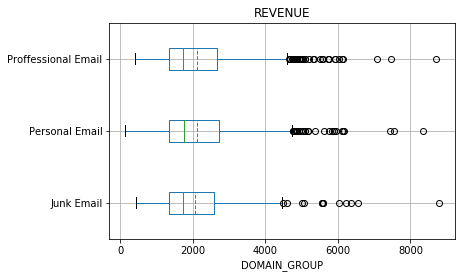

In [50]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    chef.boxplot(column 		 = response,
    	            by           = cat_var,
        	        vert         = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'DOMAIN_GROUP',
					 data     = chef)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> One Hot Encoding </h1>
Perform an operation using a the <b>get_dummies</b> function from pandas library, then drop the categorical variables.
</div>

In [51]:
# one hot encoding categorical variables
one_hot_Domain_group       = pd.get_dummies(chef['DOMAIN_GROUP'])
one_hot_All_Domain_group   = pd.get_dummies(chef['ALL_EMAIL_DOMAIN'])

# dropping categorical variables after they've been encoded
chef = chef.drop('ALL_EMAIL_DOMAIN', axis = 1)
chef = chef.drop('DOMAIN_GROUP', axis = 1)



# joining codings together
chef = chef.join([one_hot_Domain_group, one_hot_All_Domain_group])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Drop Insignificant Values </h1>
Perform an operation to drop the values using a for loop, then add the results to a Variable.
</div>

In [52]:
# making a copy of housing
chef_explanatory = chef.copy()


# dropping SalePrice and Order from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['REVENUE', 
                                          'NAME', 
                                          'EMAIL', 
                                          'FIRST_NAME',
                                          'FAMILY_NAME',
                                          'amex.com',
                                          'aol.com',
                                          'apple.com',
                                         'boeing.com',
                                         'caterpillar.com',
                                         'chevron.com',
                                         'cisco.com',
                                         'cocacola.com',
                                         'disney.com',
                                         'dupont.com',
                                         'exxon.com',
                                         'ge.org',
                                         'gmail.com',
                                         'goldmansacs.com',
                                         'homedepot.com',
                                         'hotmail.com',
                                         'ibm.com',
                                         'intel.com',
                                         'jnj.com',
                                         'jpmorgan.com',
                                         'live.com',
                                         'mcdonalds.com',
                                         'me.com',
                                         'merck.com',
                                         'microsoft.com',
                                         'mmm.com',
                                         'msn.com',
                                         'nike.com',
                                         'passport.com',
                                         'pfizer.com',
                                         'pg.com',
                                         'protonmail.com',
                                         'travelers.com',
                                         'unitedhealth.com',
                                         'unitedtech.com',
                                         'verizon.com',
                                         'visa.com',
                                         'walmart.com',
                                         'yahoo.com'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(f" chef['{val}'] + ")

 chef['CROSS_SELL_SUCCESS'] + 
 chef['TOTAL_MEALS_ORDERED'] + 
 chef['UNIQUE_MEALS_PURCH'] + 
 chef['CONTACTS_W_CUSTOMER_SERVICE'] + 
 chef['PRODUCT_CATEGORIES_VIEWED'] + 
 chef['AVG_TIME_PER_SITE_VISIT'] + 
 chef['MOBILE_NUMBER'] + 
 chef['CANCELLATIONS_BEFORE_NOON'] + 
 chef['CANCELLATIONS_AFTER_NOON'] + 
 chef['TASTES_AND_PREFERENCES'] + 
 chef['MOBILE_LOGINS'] + 
 chef['PC_LOGINS'] + 
 chef['WEEKLY_PLAN'] + 
 chef['EARLY_DELIVERIES'] + 
 chef['LATE_DELIVERIES'] + 
 chef['PACKAGE_LOCKER'] + 
 chef['REFRIGERATED_LOCKER'] + 
 chef['FOLLOWED_RECOMMENDATIONS_PCT'] + 
 chef['AVG_PREP_VID_TIME'] + 
 chef['LARGEST_ORDER_SIZE'] + 
 chef['MASTER_CLASSES_ATTENDED'] + 
 chef['MEDIAN_MEAL_RATING'] + 
 chef['AVG_CLICKS_PER_VISIT'] + 
 chef['TOTAL_PHOTOS_VIEWED'] + 
 chef['Junk Email'] + 
 chef['Personal Email'] + 
 chef['Proffessional Email'] + 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Save the data to an Excel file</h1>
Perform a to_excel function with index as False.
</div>

In [53]:
chef_explanatory.to_excel('chef_feature_engineered.xlsx',
                 index = False)

In [54]:
chef_with_out = chef.copy()


# dropping SalePrice and Order from the explanatory variable set
chef_with_out = chef.drop([
                                 'REVENUE', 
                                  'NAME', 
                                  'EMAIL', 
                                  'FIRST_NAME',
                                  'FAMILY_NAME',
                                'Junk Email', 
                                'Personal Email',
                                'Proffessional Email'
                             
                             ], axis=1)


# formatting each explanatory variable for statsmodels
for val in chef_with_out:
    print(f"chef_explanatory['{val}'] +")

chef_explanatory['CROSS_SELL_SUCCESS'] +
chef_explanatory['TOTAL_MEALS_ORDERED'] +
chef_explanatory['UNIQUE_MEALS_PURCH'] +
chef_explanatory['CONTACTS_W_CUSTOMER_SERVICE'] +
chef_explanatory['PRODUCT_CATEGORIES_VIEWED'] +
chef_explanatory['AVG_TIME_PER_SITE_VISIT'] +
chef_explanatory['MOBILE_NUMBER'] +
chef_explanatory['CANCELLATIONS_BEFORE_NOON'] +
chef_explanatory['CANCELLATIONS_AFTER_NOON'] +
chef_explanatory['TASTES_AND_PREFERENCES'] +
chef_explanatory['MOBILE_LOGINS'] +
chef_explanatory['PC_LOGINS'] +
chef_explanatory['WEEKLY_PLAN'] +
chef_explanatory['EARLY_DELIVERIES'] +
chef_explanatory['LATE_DELIVERIES'] +
chef_explanatory['PACKAGE_LOCKER'] +
chef_explanatory['REFRIGERATED_LOCKER'] +
chef_explanatory['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef_explanatory['AVG_PREP_VID_TIME'] +
chef_explanatory['LARGEST_ORDER_SIZE'] +
chef_explanatory['MASTER_CLASSES_ATTENDED'] +
chef_explanatory['MEDIAN_MEAL_RATING'] +
chef_explanatory['AVG_CLICKS_PER_VISIT'] +
chef_explanatory['TOTAL_PHOTOS_VIEWE

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Logistic Regression </h1>
Perform a Logistic regressionusing a for loop, then add the results to an empty list.
</div>

In [55]:
lm_full = smf.ols(formula = """ chef['REVENUE'] ~ chef['CROSS_SELL_SUCCESS'] +
                                chef['TOTAL_MEALS_ORDERED'] +
                                chef['UNIQUE_MEALS_PURCH'] +
                                chef['CONTACTS_W_CUSTOMER_SERVICE'] +
                                chef['PRODUCT_CATEGORIES_VIEWED'] +
                                chef['AVG_TIME_PER_SITE_VISIT'] +
                                chef['MOBILE_NUMBER'] +
                                chef['CANCELLATIONS_BEFORE_NOON'] +
                                chef['CANCELLATIONS_AFTER_NOON'] +
                                chef['TASTES_AND_PREFERENCES'] +
                                chef['MOBILE_LOGINS'] +
                                chef['PC_LOGINS'] +
                                chef['WEEKLY_PLAN'] +
                                chef['EARLY_DELIVERIES'] +
                                chef['LATE_DELIVERIES'] +
                                chef['PACKAGE_LOCKER'] +
                                chef['REFRIGERATED_LOCKER'] +
                                chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                chef['AVG_PREP_VID_TIME'] +
                                chef['LARGEST_ORDER_SIZE'] +
                                chef['MASTER_CLASSES_ATTENDED'] +
                                chef['MEDIAN_MEAL_RATING'] +
                                chef['AVG_CLICKS_PER_VISIT'] +
                                chef['TOTAL_PHOTOS_VIEWED'] +
                                chef['amex.com'] +
                                chef['aol.com'] +
                                chef['apple.com'] +
                                chef['boeing.com'] +
                                chef['caterpillar.com'] +
                                chef['chevron.com'] +
                                chef['cisco.com'] +
                                chef['cocacola.com'] +
                                chef['disney.com'] +
                                chef['dupont.com'] +
                                chef['exxon.com'] +
                                chef['ge.org'] +
                                chef['gmail.com'] +
                                chef['goldmansacs.com'] +
                                chef['homedepot.com'] +
                                chef['hotmail.com'] +
                                chef['ibm.com'] +
                                chef['intel.com'] +
                                chef['jnj.com'] +
                                chef['jpmorgan.com'] +
                                chef['live.com'] +
                                chef['mcdonalds.com'] +
                                chef['me.com'] +
                                chef['merck.com'] +
                                chef['microsoft.com'] +
                                chef['mmm.com'] +
                                chef['msn.com'] +
                                chef['nike.com'] +
                                chef['passport.com'] +
                                chef['pfizer.com'] +
                                chef['pg.com'] +
                                chef['protonmail.com'] +
                                chef['travelers.com'] +
                                chef['unitedhealth.com'] +
                                chef['unitedtech.com'] +
                                chef['verizon.com'] +
                                chef['visa.com'] +
                                chef['walmart.com'] +
                                chef['yahoo.com']""",
                                data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chef['REVENUE']   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     55.52
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:01:13   Log-Likelihood:                -15444.
No. Observations:                1946   AIC:                         3.101e+04
Df Residuals:                    1883   BIC:                         3.136e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -158.4346    337.130     -0.470      0.638    -819.623     502.754
chef['CROSS_SELL_SUCCESS']             -79.5015     40.760     -1.950      0.051    -159.441       0.438
chef['TOTAL_MEALS_ORDERED']              5.7182      0.357     16.030      0.000       5.019       6.418
chef['UNIQUE_MEALS_PURCH']             -64.7174      6.456    -10.025      0.000     -77.378     -52.056
chef['CONTACTS_W_CUSTOMER_SERVICE']     46.3692      7.068      6.560      0.000      32.507      60.231
chef['PRODUCT_CATEGORIES_VIEWED']        8.8726      5.230      1.696      0.090      -1.385      19.130
chef['AVG_TIME_PER_SITE_VISIT']         -0.6014      0.268     -2.248      0.025      -1.126      -0.077
chef['MOBILE_NUMBER']                   43.7407     48.655      0.899      0.369     -51.684     139.165
chef['CANCELLATIONS_BEFORE_NOON']        4.8222     10.396      0.464      0.643     -15.566      25.210
chef['CANCELLATIONS_AFTER_NOON']       -48.0940     36.696     -1.311      0.190    -120.063      23.875
chef['TASTES_AND_PREFERENCES']          53.1106     35.172      1.510      0.131     -15.869     122.090
chef['MOBILE_LOGINS']                    7.4451     27.343      0.272      0.785     -46.182      61.072
chef['PC_LOGINS']                      -36.6424     30.031     -1.220      0.223     -95.539      22.254
chef['WEEKLY_PLAN']                      0.1128      1.168      0.097      0.923      -2.178       2.404
chef['EARLY_DELIVERIES']                 3.8264      6.819      0.561      0.575      -9.548      17.200
chef['LATE_DELIVERIES']                  4.0127      5.756      0.697      0.486      -7.276      15.302
chef['PACKAGE_LOCKER']                 -26.8784     37.723     -0.713      0.476    -100.863      47.106
chef['REFRIGERATED_LOCKER']            -12.7086     57.165     -0.222      0.824    -124.823      99.405
chef['FOLLOWED_RECOMMENDATIONS_PCT']    -0.2414      0.673     -0.359      0.720      -1.561       1.078
chef['AVG_PREP_VID_TIME']                9.3485      0.641     14.593      0.000       8.092      10.605
chef['LARGEST_ORDER_SIZE']             -97.6377     17.328     -5.635      0.000    -131.622     -63.653
chef['MASTER_CLASSES_ATTENDED']        175.6652     28.841      6.091      0.000     119.101     232.230
chef['MEDIAN_MEAL_RATING']             341.7516     42.557      8.030      0.000     258.288     425.215
chef['AVG_CLICKS_PER_VISIT']           -19.0117     13.265     -1.433      0.152     -45.028       7.004
chef['TOTAL_PHOTOS_VIEWED']              0.6899      0.100      6.882      0.000       0.493       0.887
chef['amex.com']                       -66.0024    125.591     -0.526      0.599    -312.315     180.311
chef['aol.com']                       

Few significant variables!

In [56]:
lm_full = smf.ols(formula = """ chef['REVENUE'] ~ chef['CROSS_SELL_SUCCESS'] + 
                                 chef['TOTAL_MEALS_ORDERED'] + 
                                 chef['UNIQUE_MEALS_PURCH'] + 
                                 chef['CONTACTS_W_CUSTOMER_SERVICE'] + 
                                 chef['PRODUCT_CATEGORIES_VIEWED'] + 
                                 chef['AVG_TIME_PER_SITE_VISIT'] + 
                                 chef['MOBILE_NUMBER'] + 
                                 chef['CANCELLATIONS_BEFORE_NOON'] + 
                                 chef['CANCELLATIONS_AFTER_NOON'] + 
                                 chef['TASTES_AND_PREFERENCES'] + 
                                 chef['MOBILE_LOGINS'] + 
                                 chef['PC_LOGINS'] + 
                                 chef['WEEKLY_PLAN'] + 
                                 chef['EARLY_DELIVERIES'] + 
                                 chef['LATE_DELIVERIES'] + 
                                 chef['PACKAGE_LOCKER'] + 
                                 chef['REFRIGERATED_LOCKER'] + 
                                 chef['FOLLOWED_RECOMMENDATIONS_PCT'] + 
                                 chef['AVG_PREP_VID_TIME'] + 
                                 chef['LARGEST_ORDER_SIZE'] + 
                                 chef['MASTER_CLASSES_ATTENDED'] + 
                                 chef['MEDIAN_MEAL_RATING'] + 
                                 chef['AVG_CLICKS_PER_VISIT'] + 
                                 chef['TOTAL_PHOTOS_VIEWED'] + 
                                 chef['Junk Email'] + 
                                 chef['Personal Email'] + 
                                 chef['Proffessional Email']""",
                                 data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chef['REVENUE']   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     131.7
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:01:14   Log-Likelihood:                -15459.
No. Observations:                1946   AIC:                         3.097e+04
Df Residuals:                    1919   BIC:                         3.112e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -134.5345    257.195     -0.523      0.601    -638.945     369.876
chef['CROSS_SELL_SUCCESS']             -74.1659     40.171     -1.846      0.065    -152.949       4.618
chef['TOTAL_MEALS_ORDERED']              5.6862      0.353     16.115      0.000       4.994       6.378
chef['UNIQUE_MEALS_PURCH']             -63.6046      6.392     -9.951      0.000     -76.140     -51.069
chef['CONTACTS_W_CUSTOMER_SERVICE']     45.6553      6.999      6.523      0.000      31.928      59.382
chef['PRODUCT_CATEGORIES_VIEWED']        8.8542      5.153      1.718      0.086      -1.252      18.960
chef['AVG_TIME_PER_SITE_VISIT']         -0.6628      0.266     -2.496      0.013      -1.184      -0.142
chef['MOBILE_NUMBER']                   42.0538     48.200      0.872      0.383     -52.475     136.583
chef['CANCELLATIONS_BEFORE_NOON']        3.3807     10.272      0.329      0.742     -16.765      23.526
chef['CANCELLATIONS_AFTER_NOON']       -45.7763     36.320     -1.260      0.208    -117.007      25.455
chef['TASTES_AND_PREFERENCES']          43.5634     34.784      1.252      0.211     -24.655     111.782
chef['MOBILE_LOGINS']                    7.5754     26.978      0.281      0.779     -45.335      60.486
chef['PC_LOGINS']                      -39.6473     29.795     -1.331      0.183     -98.081      18.787
chef['WEEKLY_PLAN']                     -0.0206      1.156     -0.018      0.986      -2.287       2.246
chef['EARLY_DELIVERIES']                 3.6875      6.750      0.546      0.585      -9.551      16.926
chef['LATE_DELIVERIES']                  4.7894      5.706      0.839      0.401      -6.402      15.981
chef['PACKAGE_LOCKER']                 -22.9105     37.342     -0.614      0.540     -96.145      50.324
chef['REFRIGERATED_LOCKER']            -21.7410     56.451     -0.385      0.700    -132.453      88.971
chef['FOLLOWED_RECOMMENDATIONS_PCT']    -0.2561      0.666     -0.384      0.701      -1.563       1.051
chef['AVG_PREP_VID_TIME']                9.3517      0.632     14.787      0.000       8.111      10.592
chef['LARGEST_ORDER_SIZE']             -96.2328     17.064     -5.640      0.000    -129.698     -62.767
chef['MASTER_CLASSES_ATTENDED']        175.6031     28.526      6.156      0.000     119.658     231.548
chef['MEDIAN_MEAL_RATING']             342.2002     42.164      8.116      0.000     259.507     424.893
chef['AVG_CLICKS_PER_VISIT']           -18.2719     13.110     -1.394      0.164     -43.983       7.439
chef['TOTAL_PHOTOS_VIEWED']              0.6948      0.099      7.019      0.000       0.501       0.889
chef['Junk Email']                     -73.8147     89.661     -0.823      0.410    -249.658     102.029
chef['Personal Email']                

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> TRAIN TEST SPLIT </h1>
Perform a train test split using Sklearn modules, then add the training size as 75%.
</div>

In [57]:


chef_data = chef.drop(['REVENUE',
                        'NAME',
                        'EMAIL',
                      'FIRST_NAME',
                      'FAMILY_NAME'],
                                axis = 1)


# preparing response variable data
chef_target = chef.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 66)
(1459,)
(487, 66)
(487,)


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Trained Linear Model </h1>
Perform an Email Split using a for loop, then add the results to an empty list.
</div>

In [58]:
chef_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: Build a model with all possible and relevant variable 
chef_linear_model = smf.ols(formula ="""    REVENUE ~chef_train['CROSS_SELL_SUCCESS'] +
                                            chef_train['TOTAL_MEALS_ORDERED'] +
                                            chef_train['UNIQUE_MEALS_PURCH'] +
                                            chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                            chef_train['PRODUCT_CATEGORIES_VIEWED'] +
                                            chef_train['AVG_TIME_PER_SITE_VISIT'] +
                                            chef_train['MOBILE_NUMBER'] +
                                            chef_train['CANCELLATIONS_BEFORE_NOON'] +
                                            chef_train['CANCELLATIONS_AFTER_NOON'] +
                                            chef_train['TASTES_AND_PREFERENCES'] +
                                            chef_train['MOBILE_LOGINS'] +
                                            chef_train['PC_LOGINS'] +
                                            chef_train['WEEKLY_PLAN'] +
                                            chef_train['EARLY_DELIVERIES'] +
                                            chef_train['LATE_DELIVERIES'] +
                                            chef_train['PACKAGE_LOCKER'] +
                                            chef_train['REFRIGERATED_LOCKER'] +
                                            chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                            chef_train['AVG_PREP_VID_TIME'] +
                                            chef_train['LARGEST_ORDER_SIZE'] +
                                            chef_train['MASTER_CLASSES_ATTENDED'] +
                                            chef_train['MEDIAN_MEAL_RATING'] +
                                            chef_train['AVG_CLICKS_PER_VISIT'] +
                                            chef_train['TOTAL_PHOTOS_VIEWED'] """,
                                            data = chef_train)
# Step 2: fitting the model based on the OLS linear model 
results = chef_linear_model.fit()



# Step 3: to analyze the summary output use summary fucntion
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          7.02e-306
Time:                        23:01:17   Log-Likelihood:                -11581.
No. Observations:                1459   AIC:                         2.321e+04
Df Residuals:                    1434   BIC:                         2.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [59]:
from sklearn.linear_model import LinearRegression

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scikit Learn - Linear Regression</h1>
Perform an fit operation to the training and testing sets using .fit(), then predict the results using predict function. Finally, use .score() method to get the resulted R^2.
</div>

In [60]:

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

Training Score: 0.6595
Testing Score: 0.5828


The model is slightly accurate lets check with other models.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scikit Learn - Ridge Regression</h1>
Perform an fit operation to the training and testing sets using .fit(), then predict the results using predict function. Finally, use .score() method to get the resulted R^2.
</div>

In [61]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.6595
Testing Score: 0.5842


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scikit Learn - Lasso Regression</h1>
Perform an fit operation to the training and testing sets using .fit(), then predict the results using predict function. Finally, use .score() method to get the resulted R^2.
</div>

In [62]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.6579
Testing Score: 0.5921


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scikit Learn - Bayesian </h1>
Perform an fit operation to the training and testing sets using .fit(), then predict the results using predict function. Finally, use .score() method to get the resulted R^2.
</div>

In [63]:
# INSTANTIATING a model object
bayesian_model = sklearn.linear_model.BayesianRidge()

# FITTING the training data
bayesian_fit = bayesian_model.fit(X_train, y_train)


# PREDICTING on new data
bayesian_pred = bayesian_model.predict(X_test)

print('Training Score:', bayesian_model.score(X_train, y_train).round(4))
print('Testing Score:',  bayesian_model.score(X_test, y_test).round(4))


# saving scoring data for future use
bayesian_train_score = bayesian_model.score(X_train, y_train).round(4)
bayesian_test_score  = bayesian_model.score(X_test, y_test).round(4)

Training Score: 0.6521
Testing Score: 0.5975


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Compare All Scores</h1>
Print all results in one cell
</div>

In [64]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
Bayesian   {bayesian_train_score}           {bayesian_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'Bayesian'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, bayesian_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, bayesian_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6595           0.5828
Ridge      0.6595           0.5842
Lasso      0.6579           0.5921
Bayesian   0.6521           0.5975



In [65]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
from sklearn.model_selection import train_test_split # train/test split


# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file names
dataset_file     = 'chef_feature_engineered.xlsx'
performance_file = 'regression_model_performance.xlsx'

# reading the files into Python
chef_engineered    = pd.read_excel(dataset_file)
performance = pd.read_excel(performance_file)



In [66]:
chef_engineered.columns

Index(['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'Junk Email', 'Personal Email', 'Proffessional Email'], dtype='object')

In [67]:

# declaring set of x-variables
x_variables = [
                
               'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
               'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 
               'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
               'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 
               'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 
               'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
               'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT', 
               'TOTAL_PHOTOS_VIEWED' ]


# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
chef_data   = chef.loc[ : , x_variables]
# preparing the target based on the anakysis 
chef_target = chef.loc[ : , 'REVENUE']




<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scale</h1>
Perform an Standard scalar operation to the training and testing sets using .fit(), then predict the results using predict function. Finally, use .score() method to get the resulted R^2.
</div>

In [68]:
# INSTANTIATING a StandardScaler() object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# FITTING the scaler with the data
chef_scaled = scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-1.33,-2.37,-2.86,-0.94,-2.37,-3.65,-0.59
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.96,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.20,-0.10,-0.28,0.62,0.27,-0.22,-0.59
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.93,0.47,0.36,0.62,0.27,0.64,0.37
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,2.05,8.37,4.23,3.73,2.92,2.35,8.25


In [69]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""") 


Dataset BEFORE Scaling
----------------------
CROSS_SELL_SUCCESS                  0.218020
TOTAL_MEALS_ORDERED              3057.599946
UNIQUE_MEALS_PURCH                  6.257663
CONTACTS_W_CUSTOMER_SERVICE         5.201168
PRODUCT_CATEGORIES_VIEWED           9.261178
AVG_TIME_PER_SITE_VISIT          3884.497383
MOBILE_NUMBER                       0.107344
CANCELLATIONS_BEFORE_NOON           2.400263
CANCELLATIONS_AFTER_NOON            0.186736
TASTES_AND_PREFERENCES              0.204082
MOBILE_LOGINS                       0.337105
PC_LOGINS                           0.278218
WEEKLY_PLAN                       184.139876
EARLY_DELIVERIES                    5.373137
LATE_DELIVERIES                     7.528947
PACKAGE_LOCKER                      0.229000
REFRIGERATED_LOCKER                 0.100272
FOLLOWED_RECOMMENDATIONS_PCT      706.023186
AVG_PREP_VID_TIME                2443.767133
LARGEST_ORDER_SIZE                  2.404278
MASTER_CLASSES_ATTENDED             0.411780
MEDIAN_M

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Creat Heatmaps</h1>

</div>

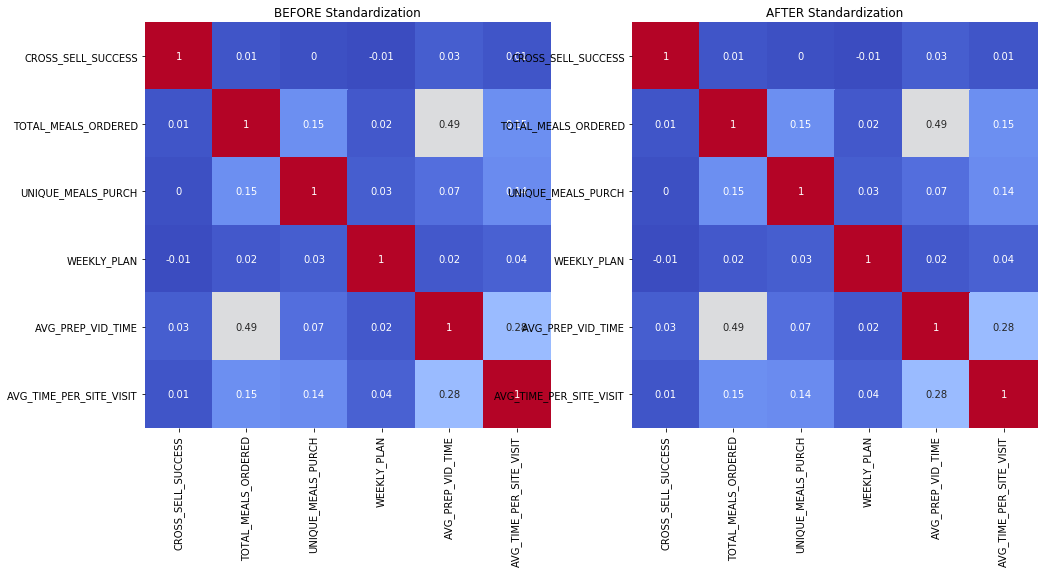

In [70]:
##############################################################################
# Unscaled Dataset Analyize
##############################################################################

# subsetting the original dataset
chef_subset = chef_data.loc[ : , ['CROSS_SELL_SUCCESS',
                                        'TOTAL_MEALS_ORDERED',
                                        'UNIQUE_MEALS_PURCH',
                                        'WEEKLY_PLAN',
                                        'AVG_PREP_VID_TIME',
                                        'AVG_TIME_PER_SITE_VISIT']]


# UNSCALED correlation matrix
df_corr = chef_subset.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar)



##############################################################################
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = X_scaled_df.loc[ : , ['CROSS_SELL_SUCCESS',
                                        'TOTAL_MEALS_ORDERED',
                                        'UNIQUE_MEALS_PURCH',
                                        'WEEKLY_PLAN',
                                        'AVG_PREP_VID_TIME',
                                        'AVG_TIME_PER_SITE_VISIT']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")


# setting plot window
plt.subplot(1, 2, 2)


# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False) # surpressing the color bar


# titling the plot
plt.title("AFTER Standardization")
plt.savefig('Corrplots Before and After Scaling.png')
plt.show()

In [71]:
import xgboost as xgb

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Scikit Learn - Gradient Descent</h1>
Perform an fit operation to the training and testing sets using .fit(), then predict the results using predict function. Finally, use .score() method to get the resulted R^2.
</div>

In [72]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd 
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.30,
            random_state = 219)


# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

print("R^2: {}".format(xg_reg.score(X_test, y_test)))




[23:01:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 996.321564
R^2: 0.16848972028580977


In [73]:
from sklearn.linear_model import LinearRegression
# Create the regressor: reg_all
reg_all = LinearRegression()
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.6050151026531082
Root Mean Squared Error: 686.6824754423191


In [74]:
from sklearn.linear_model import BayesianRidge
# Create the regressor: reg_all
reg_all = BayesianRidge()
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.6056277698507382
Root Mean Squared Error: 686.1497068491717


<h1>Thank you for completing this notebook!</h1>

<h3>About the Author:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/sarthakarun/" target="_blank">Sarthak Jagdale MSc</a>.

<p><a href="https://www.linkedin.com/in/sarthakarun/" target="_blank">Sarthak Jagdale</a> is a Data Scientist, and holds a MSc in Data Science and Btech in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how behavior impact human cognition. Sarthak has been working for several projects since he completed his second Masters.</p>